# Assignment 7:

## Simulated Annealing to find to minimize function

* The simpleannealing function takes in a single parameter frame, which is the current frame number in the animation. Inside the function, a random change dx is made to the current best solution bestx. The new solution x is evaluated using the given function1 and the resulting cost y is compared with the current best cost bestcost. 
* If the new cost is lower than the current best cost, the new solution becomes the new best solution. Otherwise, there is a chance that the new solution will be accepted anyway, based on a probability that decreases as the temperature T decreases. The temperature T decreases with each iteration based on a decay rate decayrate.

* The animation function sets up the animation using FuncAnimation from matplotlib. It takes in the function to be optimized (function), the current best solution (bestx), the current best cost (bestcost), the starting temperature (T), and the decay rate (decayrate). It sets the number of frames to be 100, the interval between frames to be 10 milliseconds, and sets repeat to False to prevent the animation from looping indefinitely. The function returns the resulting animation object ani.

In [6]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

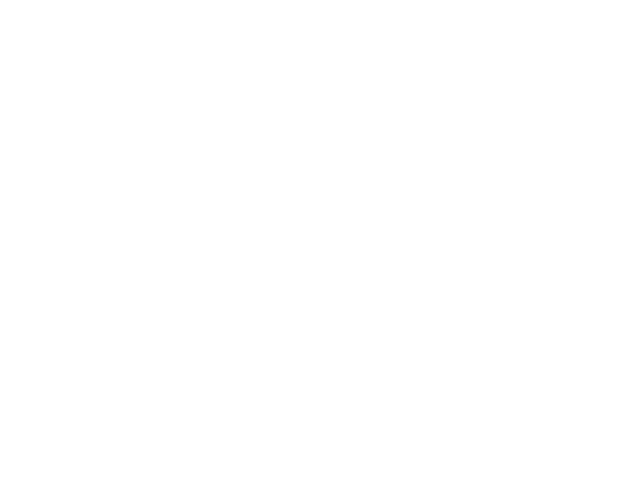

In [7]:
plt.clf()
def simpleannealing(frame):
    global bestcost,bestx,decayrate,T
    dx= (np.random.random_sample()-0.5)*T
    x= bestx + dx
    y= function1(x)
    if y<bestcost:
        bestcost=y
        bestx=x
        lngood.set_data([x],[y])
    else:
        toss=np.random.random_sample()
        if toss<np.exp(-(y-bestcost)/T):
            bestcost=y
            bestx=x
            lngood.set_data([x],[y])
        pass
    T=T * decayrate
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall,yall)
    plt.draw()

def animation(function,bestx,bestcost,T,decayrate):        
    ani= FuncAnimation(fig, simpleannealing, frames=range(100), interval=10, repeat=False)
    return ani


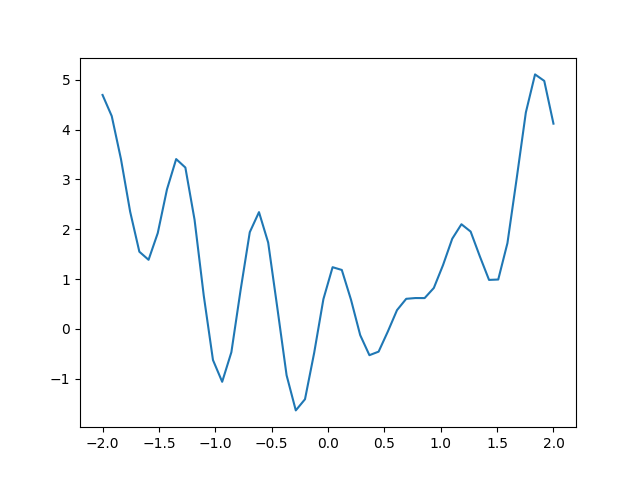

In [8]:
def function1(x):
    return  x**2 + np.sin(8*x)+np.cos(10*x)

xbase=np.linspace(-2,2)
ybase=function1(xbase)
bestx = -2
bestcost = function1(bestx)
T = 3
decayrate= 0.95

rangemin, rangemax = -2, 2 
fig, ax= plt.subplots()
ax.plot(xbase,ybase)
xall,yall =[],[]
lnall, =ax.plot([],[],'ro')
lngood, =ax.plot([],[],'go',markersize=10)
ani=animation(function1,-2,bestcost,3,0.95)
plt.show()       
    

In [9]:
plt.clf()
def simpleannealing(frame):
    global bestcost,bestx,decayrate,T
    dx= (np.random.random_sample()-0.5)*T
    x= bestx + dx
    y= function2(x)
    if y<bestcost:
        bestcost=y
        bestx=x
        lngood.set_data([x],[y])
    else:
        toss=np.random.random_sample()
        if toss<np.exp(-(y-bestcost)/T):
            bestcost=y
            bestx=x
            lngood.set_data([x],[y])
        pass
    T=T * decayrate
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall,yall)
    plt.draw()

def animation(function,bestx,bestcost,T,decayrate):        
    ani= FuncAnimation(fig, simpleannealing, frames=range(100), interval=10, repeat=False)
    return ani


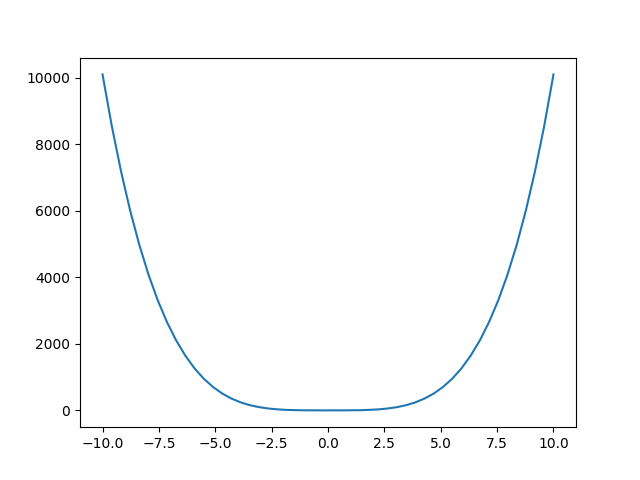

In [10]:
plt.clf()
def function2(x):
    return x**2 + np.sin(8*x)+x**4

xbase=np.linspace(-10,10)
ybase=function2(xbase)
bestx = -10
bestcost = function2(bestx)
T = 3
decayrate= 0.95

rangemin, rangemax = -10, 10 
fig, ax= plt.subplots()
ax.plot(xbase,ybase)
xall,yall =[],[]
lnall, =ax.plot([],[],'ro')
lngood, =ax.plot([],[],'go',markersize=10)
ani1=animation(function2,-10,1000,3,0.95)
plt.show()       
    

# Observation 
* Using simulated annealing we have chances to get minimum value more but we cant get optimum solution
* There will be different values coming up different time

# Travelling Salesman Problem by neighbor algorithm

For this problem we use a code that reads in a file containing coordinates of cities and uses the nearest neighbor algorithm to find the shortest path that visits each city exactly once and returns to the starting city. The output includes the shortest path length and the sequence of cities visited in the order they are visited. Finally, the code plots the sequence of cities visited on a graph.The functions used here are:-

* The read_input_file function reads in a file containing the coordinates of cities and returns a list of tuples representing the cities.

* The distance function calculates the Euclidean distance between two cities using their coordinates.

* The nearest_neighbor function implements the nearest neighbor algorithm. It takes in a list of cities and an optional starting city (default is the first city) and returns a list of indices representing the order in which the cities are visited. The algorithm starts with the starting city and at each step chooses the unvisited city closest to the current city until all cities have been visited.

* The main function reads in the coordinates of cities from a file named 'tsp_10.txt', uses the nearest_neighbor function to find the shortest path, calculates the length of the shortest path and prints it out along with the sequence of cities visited. Finally, it creates two lists xcity and ycity containing the x and y coordinates of the cities in the order they are visited and plots them using matplotlib.



## For 10 Cities

Shortest path length: 34.43384302733041
[0, 5, 4, 3, 1, 7, 9, 8, 2, 6, 0]


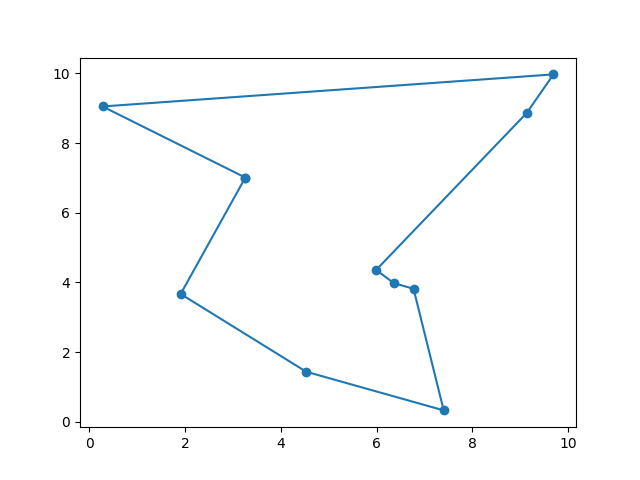

In [11]:
plt.clf()
import numpy as np
import sys

def read_input_file(file_path):
    with open(file_path, 'r') as f:
        n = int(f.readline())
        cities = []
        for i in range(n):
            x, y = map(float, f.readline().split())
            cities.append((x, y))
        return cities

def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def nearest_neighbor(cities, start_city=0):
    n = len(cities)
    visited = [0] * n
    route = [start_city]
    visited[start_city] = 1
    for i in range(n-1):
        last_city = route[-1]
        nearest_city = None
        nearest_distance = sys.float_info.max
        for j in range(n):
            if not visited[j]:
                d = distance(cities[last_city], cities[j])
                if d < nearest_distance:
                    nearest_city = j
                    nearest_distance = d
        route.append(nearest_city)
        visited[nearest_city] = 1
    route.append(start_city)
    return route

if __name__ == '__main__':
    cities = read_input_file('tsp_10.txt')
    route = nearest_neighbor(cities)
    total_distance = sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route)-1))
    print(f"Shortest path length: {total_distance}")
    print(route)
    xcity=[]
    
    ycity=[]
    for i in range(0,len(route)):
        xcity.append(cities[route[i]][0])
        ycity.append(cities[route[i]][1])
    plt.plot(xcity, ycity, 'o-')
    plt.show()

## For 100 Cities

Shortest path length: 90.28052234607274
[0, 34, 95, 63, 38, 57, 12, 72, 92, 87, 45, 47, 68, 51, 49, 48, 75, 58, 46, 82, 98, 62, 33, 32, 79, 70, 1, 81, 44, 37, 11, 9, 66, 20, 83, 91, 28, 64, 96, 73, 90, 71, 59, 29, 53, 97, 31, 55, 3, 54, 21, 22, 36, 80, 18, 99, 7, 27, 14, 93, 65, 52, 39, 15, 50, 42, 84, 25, 86, 30, 19, 6, 76, 16, 88, 17, 41, 4, 89, 2, 5, 26, 8, 23, 13, 85, 10, 67, 78, 35, 77, 69, 43, 94, 24, 74, 40, 60, 61, 56, 0]


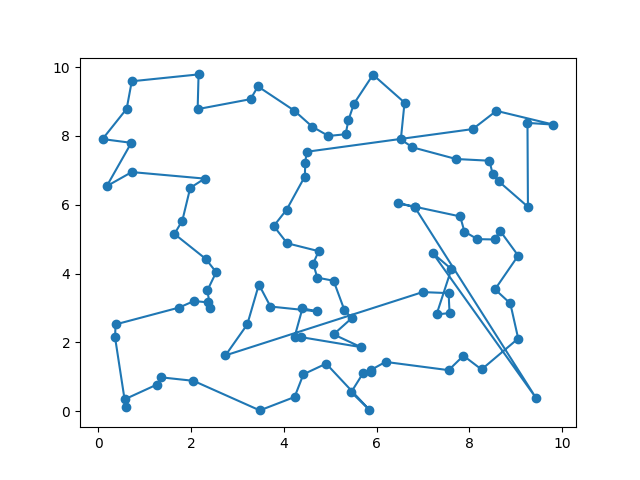

In [26]:
plt.clf()
import numpy as np
import sys

def read_input_file(file_path):
    with open(file_path, 'r') as f:
        n = int(f.readline())
        cities = []
        for i in range(n):
            x, y = map(float, f.readline().split())
            cities.append((x, y))
        return cities

def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def nearest_neighbor(cities, start_city=0):
    n = len(cities)
    visited = [0] * n
    route = [start_city]
    visited[start_city] = 1
    for i in range(n-1):
        last_city = route[-1]
        nearest_city = None
        nearest_distance = sys.float_info.max
        for j in range(n):
            if not visited[j]:
                d = distance(cities[last_city], cities[j])
                if d < nearest_distance:
                    nearest_city = j
                    nearest_distance = d
        route.append(nearest_city)
        visited[nearest_city] = 1
    route.append(start_city)
    return route

if __name__ == '__main__':
    cities = read_input_file('tsp_100.txt')
    route = nearest_neighbor(cities)
    total_distance = sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route)-1))
    print(f"Shortest path length: {total_distance}")
    print(route)
    xcity=[]
    
    ycity=[]
    for i in range(0,len(route)):
        xcity.append(cities[route[i]][0])
        ycity.append(cities[route[i]][1])
    plt.plot(xcity, ycity, 'o-')
    plt.show()

In [13]:
plt.clf()

# Travelling salesman problem using Simulated Annealing

* The code reads a list of cities from a file, then uses the simple annealing algorithm to find an approximate solution to the traveling salesman problem. The resulting route is printed to the console.

* The read_cities function reads the input file, which is assumed to have the following format:

* The first line contains an integer n, the number of cities.
  Each of the next n lines contains two floating-point numbers, representing the x and y coordinates of a city.
  The function returns a list of tuples, where each tuple contains the x and y coordinates of a city.

* The distance function computes the Euclidean distance between two cities, given their coordinates.

* The route_length function computes the total length of a given route, which is the sum of the distances between consecutive cities in the route.

* The simple_annealing function implements the simple annealing algorithm to find a good route. The algorithm starts with a random route and iteratively perturbs it by swapping two cities, and accepts the new route with a probability determined by the temperature parameter. The temperature decreases over time according to the cooling_rate parameter. The function returns the final route found by the algorithm.

* The main code reads the list of cities from the tsp_10.txt file and tsp_100.txt file, runs the simple annealing algorithm on it, and prints the resulting route to the console.

[0, 9, 4, 3, 1, 7, 8, 2, 6, 5, 0, 0]
Shortest path length: 39.66650781292793


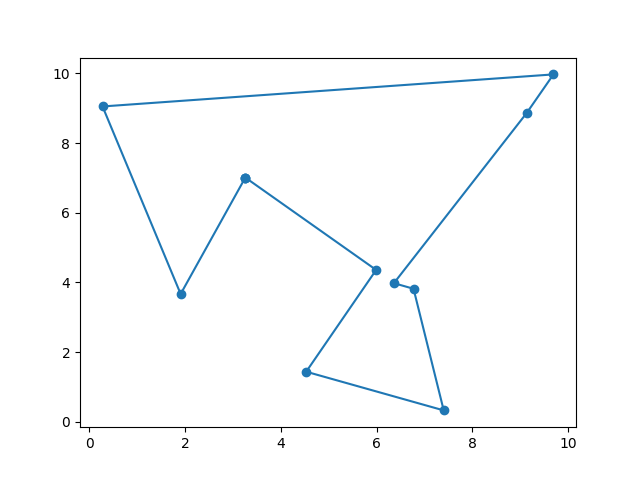

In [33]:
plt.clf()
import math
import random

def read_cities(file_name):
    with open(file_name, 'r') as f:
        lines = f.readlines()
        n = int(lines[0])
        cities = []
        for i in range(1, n+1):
            x, y = map(float, lines[i].split())
            cities.append((x, y))
        return cities

def distance(city1, city2):
    return math.sqrt((city2[0]-city1[0])**2 + (city2[1]-city1[1])**2)

def route_length(route, cities):
    length = 0
    for i in range(len(route)):
        length += distance(cities[route[i]], cities[route[(i+1)%len(route)]])
    return length

def simple_annealing(cities, initial_temperature=3, cooling_rate=0.99):
    route = list(range(len(cities)))
    random.shuffle(route)
    route = [0] + route + [0]
    temperature = initial_temperature
    while temperature > 1e-15:
        current_length = route_length(route, cities)
        i, j = random.sample(range(1, len(route)-1), 2)
        new_route = route.copy()
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_length = route_length(new_route, cities)
        if new_length < current_length:
            route = new_route
        else:
            delta = new_length - current_length
            probability = math.exp(-delta/temperature)
            if random.random() < probability:
                route = new_route
        temperature *= cooling_rate
    return route

cities = read_cities('tsp_10.txt')
route = simple_annealing(cities)
print(route)
total_distance = sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route)-1))
print(f"Shortest path length: {total_distance}")

xcity=[]
    
ycity=[]
for i in range(0,len(route)):
    xcity.append(cities[route[i]][0])
    ycity.append(cities[route[i]][1])
plt.plot(xcity, ycity, 'o-')
plt.show()

[0, 65, 14, 27, 7, 18, 99, 34, 0, 19, 30, 25, 15, 74, 94, 63, 12, 84, 57, 38, 60, 13, 48, 82, 46, 51, 8, 67, 2, 4, 91, 83, 77, 78, 26, 40, 45, 56, 68, 47, 90, 29, 59, 73, 11, 37, 44, 81, 1, 32, 61, 52, 93, 22, 21, 3, 53, 71, 41, 75, 58, 35, 66, 9, 96, 16, 88, 89, 5, 24, 72, 92, 87, 49, 43, 70, 79, 76, 6, 80, 36, 55, 31, 97, 54, 64, 20, 62, 33, 98, 23, 85, 10, 69, 28, 17, 39, 50, 86, 42, 95, 0]
Shortest path length: 174.88386716532654


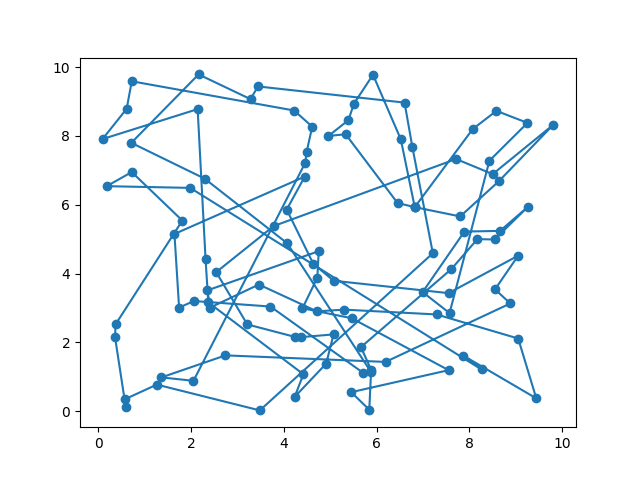

In [30]:
plt.clf()
import math
import random

def read_cities(file_name):
    with open(file_name, 'r') as f:
        lines = f.readlines()
        n = int(lines[0])
        cities = []
        for i in range(1, n+1):
            x, y = map(float, lines[i].split())
            cities.append((x, y))
        return cities

def distance(city1, city2):
    return math.sqrt((city2[0]-city1[0])**2 + (city2[1]-city1[1])**2)

def route_length(route, cities):
    length = 0
    for i in range(len(route)):
        length += distance(cities[route[i]], cities[route[(i+1)%len(route)]])
    return length

def simple_annealing(cities, initial_temperature=3, cooling_rate=0.99):
    route = list(range(len(cities)))
    random.shuffle(route)
    route = [0] + route + [0]
    temperature = initial_temperature
    while temperature > 1e-15:
        current_length = route_length(route, cities)
        i, j = random.sample(range(1, len(route)-1), 2)
        new_route = route.copy()
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_length = route_length(new_route, cities)
        if new_length < current_length:
            route = new_route
        else:
            delta = new_length - current_length
            probability = math.exp(-delta/temperature)
            if random.random() < probability:
                route = new_route
        temperature *= cooling_rate
    return route

cities = read_cities('tsp_100.txt')
route = simple_annealing(cities)
print(route)
total_distance = sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route)-1))
print(f"Shortest path length: {total_distance}")

xcity=[]
    
ycity=[]
for i in range(0,len(route)):
    xcity.append(cities[route[i]][0])
    ycity.append(cities[route[i]][1])
plt.plot(xcity, ycity, 'o-')
plt.show()